(Text(0.5,1,'Sharpened-Gaussian'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

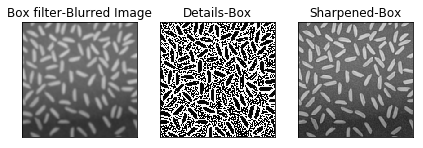

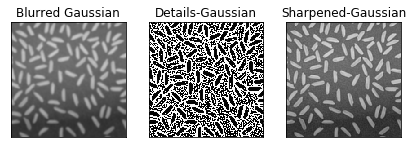

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import compare_psnr

#1.2-Sharpening
#sharpened image = original image +details 
#details = original image - blurred image 

#load images
image_path = "rice.png"
img = cv2.imread(image_path)

details= img.copy() #for now it is still original image
height, width, depth = img.shape # reading image size
sharpened= img.copy() #for now it is still original image

details2= img.copy()
sharpened2= img.copy()

#5x5 kernel
kernel = np.ones((5,5), np.float32)/(5*5)
# filter the image, blurred using box filter
blurredimg = cv2.filter2D(img, -1, kernel)

# filter image using, Gaussian blurr
blurredimg2 = cv2.GaussianBlur(img, (5,5), 2)

#Sharpen using Box filter as blurred image
details = details - blurredimg       
sharpened = sharpened + details
       
#Sharpen using Gaussian Filter as blurred 
details2 = details2 - blurredimg2
sharpened2= sharpened2 + details2
  
            
# convert from BGR to RGB for displaying
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
blurredimg = cv2.cvtColor(blurredimg, cv2.COLOR_BGR2RGB)
details = cv2.cvtColor(details,cv2.COLOR_BGR2RGB)
sharpened = cv2.cvtColor(sharpened,cv2.COLOR_BGR2RGB)
blurredimg2 =cv2.cvtColor(blurredimg2,cv2.COLOR_BGR2RGB)

details2 = cv2.cvtColor(details2,cv2.COLOR_BGR2RGB)
sharpened2 = cv2.cvtColor(sharpened2,cv2.COLOR_BGR2RGB)

# plot

plt.figure(figsize=(7, 7))


plt.subplot(231), plt.imshow(blurredimg)
plt.title("Box filter-Blurred Image"), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(details)
plt.title("Details-Box"), plt.xticks([]), plt.yticks([])

plt.subplot(233), plt.imshow(sharpened)
plt.title("Sharpened-Box"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(7, 7))
plt.subplot(234), plt.imshow(blurredimg2)
plt.title("Blurred Gaussian"), plt.xticks([]), plt.yticks([])

plt.subplot(235), plt.imshow(details2)
plt.title("Details-Gaussian"), plt.xticks([]), plt.yticks([])

plt.subplot(236), plt.imshow(sharpened2)
plt.title("Sharpened-Gaussian"), plt.xticks([]), plt.yticks([])



1.22 

Box Filter cannot distinguish between random noise or edges whereas the Gaussian Filter removes high frequency components, allowing for better 'smoothing'. 

The Gaussian filter outputs a weighted average of each pixels neighbourhood whereas the box filter uses a uniform weighted average, allowing Gaussian filters to perserve edges better than the mean filter, therefore provide a superior result when used for sharpening. In the example above, we do not observe a significant difference.
